# 자연어 처리 시작하기
- 설치 목록
    - JDK (Java SE Downloads)
    - JAVA_HOME 설정
    - JPype 설치
    - KoNLPy 설치
    - Word Cloud 설치

## 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치
- KoNLPy : pip install konlpy
- JPype1 : conda install -c conda-forge jpype1
    - 이후 Jupyter Notebook 재실행 필요
- JDK 설치 : Java JDK로 검색해서 OS에 맞춰 설치
    - JAVA_HOME 설정 : 교재내용 참조

## 한글 자연어 처리 기초

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

In [2]:
kkma.sentences('한국어 분석을 시작합니다. 재미있어요~~')

['한국어 분석을 시작합니다.', '재미있어요~~']

In [3]:
# 명사 분석
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [4]:
# 형태소 분석
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [5]:
# 한나눔 사용
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [6]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [7]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [8]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [9]:
from konlpy.tag import Twitter
t = Twitter()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [10]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [11]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [12]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

## 워드 클라우드
    - WordCloud 설치 : pip install wordcloud
    - 문서 자체에서 단어를 카운트하는 기능 제공한다.

In [13]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [14]:
text = open('../data/09. alice.txt').read()
alice_mask = np.array(Image.open('../data/09. alice_mask.png'))

# stopwords에 저장하면 count하지 않는다.
stopwords = set(STOPWORDS)
stopwords.add("said")

In [15]:
import matplotlib.pyplot as plt
import platform

path = "C://Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

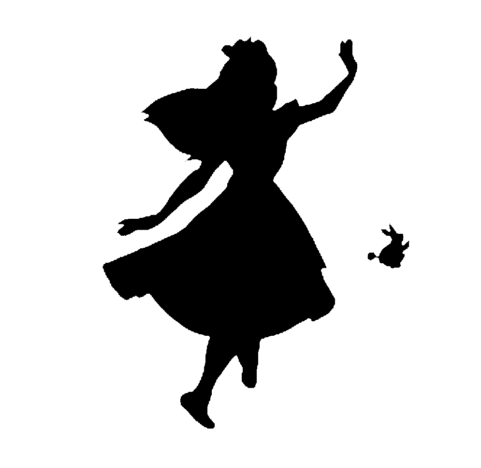

In [16]:
plt.figure(figsize=(8, 8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

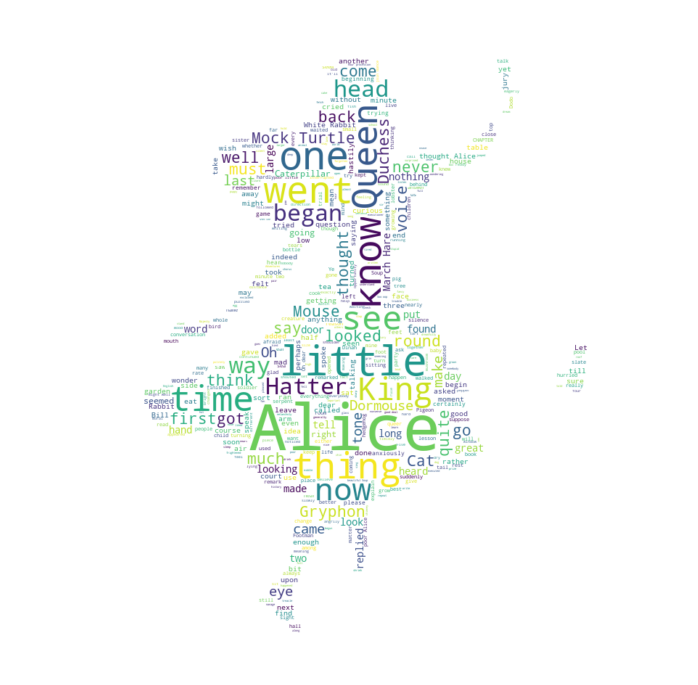

In [18]:
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
text = open('../data/09. a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('../data/09. stormtrooper_mask.png'))

In [20]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [21]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords,
              margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [22]:
# 전체 색상을 회색으로 채우는 함수
import random
def grey_color_func(word, font_size, position, orientaiton=None,
                   random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60, 100)

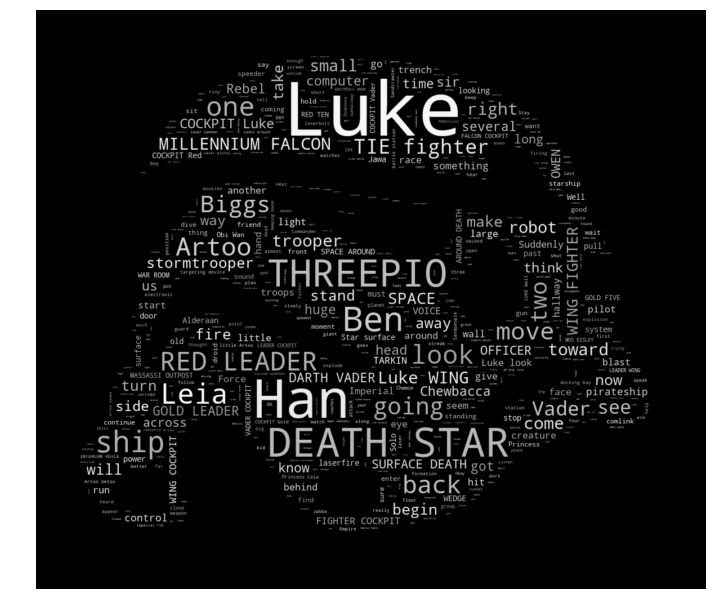

In [23]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
    interpolation='bilinear')
plt.axis('off')
plt.show()

## 육아휴직관련 법안 대한민국 국회 제 1809890호 의안

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [26]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [27]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [28]:
ko = nltk.Text(tokens_ko, name="대한민국 국회 의안 제 1809890호")

In [29]:
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

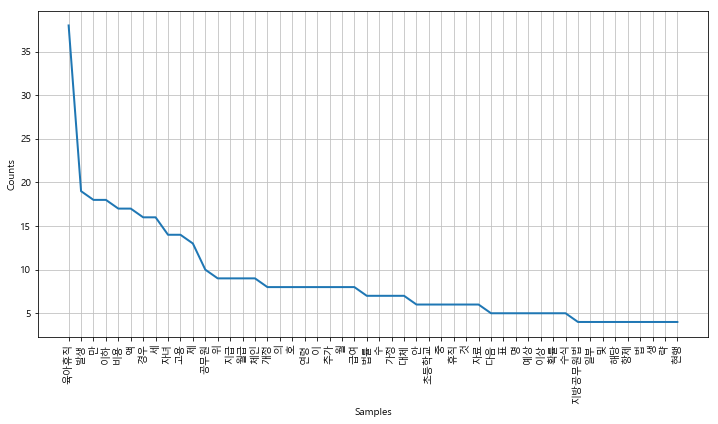

In [30]:
plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

In [31]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']
ko = [each_word for each_word in ko if each_word not in stop_words]


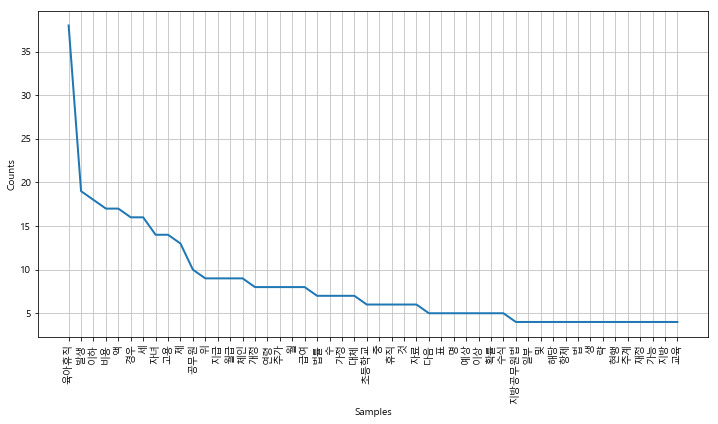

In [32]:
ko = nltk.Text(ko, name="대한민국 국회 의안 제 1809890호")

plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

In [33]:
ko.count('초등학교')

6

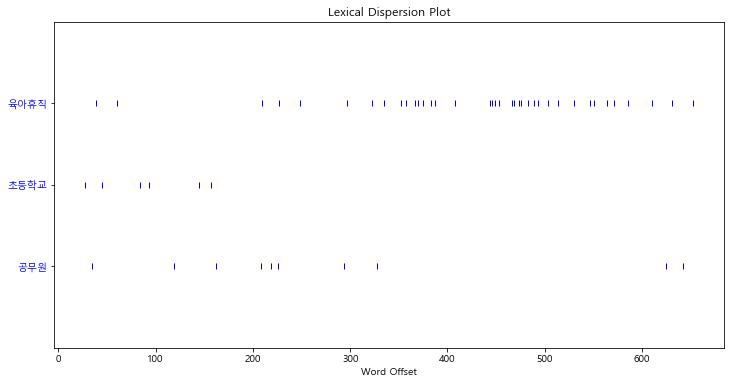

In [34]:
# 단어의 문서 내 위치를 개략적으로 분량과 함께 알 수 있다.
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [35]:
# 주변부 단어
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


In [36]:
# 어떤 단어들이 연어(연결)로 사용되었는지
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


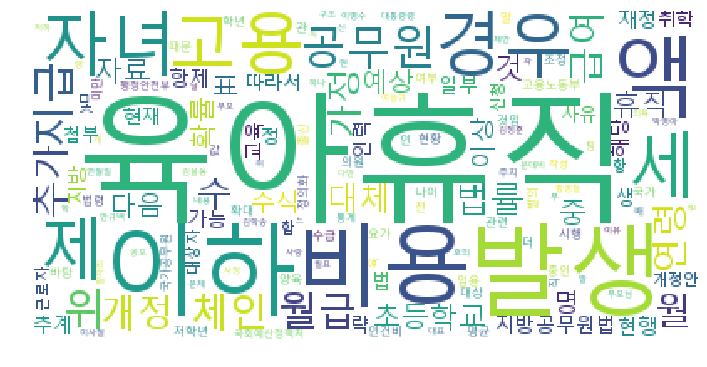

In [40]:
data = ko.vocab().most_common(150)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Naive Bayes Classifier의 이해 - 영문

In [41]:
from nltk.tokenize import word_tokenize
import nltk

In [42]:
train = [('i like you', 'pos'), 
         ('i hate you', 'neg'), 
         ('you like me', 'neg'),
         ('i like her', 'pos')]

In [43]:
# train에 쓰인 전체 단어 출력
all_words = set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [44]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                    for x in train]
t

[({'like': True,
   'i': True,
   'hate': False,
   'me': False,
   'her': False,
   'you': True},
  'pos'),
 ({'like': False,
   'i': True,
   'hate': True,
   'me': False,
   'her': False,
   'you': True},
  'neg'),
 ({'like': True,
   'i': False,
   'hate': False,
   'me': True,
   'her': False,
   'you': True},
  'neg'),
 ({'like': True,
   'i': True,
   'hate': False,
   'me': False,
   'her': True,
   'you': False},
  'pos')]

In [48]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                     her = False             neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0


In [49]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

{'like': True,
 'i': True,
 'hate': False,
 'me': False,
 'her': False,
 'you': False}

In [50]:
classifier.classify(test_sent_features)

'pos'

## Naive Bayes Classifier의 이해_한글

In [51]:
from konlpy.tag import Twitter

In [52]:
pos_tagger = Twitter()

In [54]:
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [55]:
all_words = set(word.lower() for sentence in train
                        for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [56]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'마치고': False,
   '메리가': True,
   '난': False,
   '수업이': False,
   '이쁜': False,
   '고양이야': False,
   '놀거야': False,
   '좋아': True,
   '지루해': False,
   '고양이도': False,
   '메리랑': False,
   '메리는': False},
  'pos'),
 ({'마치고': False,
   '메리가': False,
   '난': False,
   '수업이': False,
   '이쁜': False,
   '고양이야': False,
   '놀거야': False,
   '좋아': True,
   '지루해': False,
   '고양이도': True,
   '메리랑': False,
   '메리는': False},
  'pos'),
 ({'마치고': False,
   '메리가': False,
   '난': True,
   '수업이': True,
   '이쁜': False,
   '고양이야': False,
   '놀거야': False,
   '좋아': False,
   '지루해': True,
   '고양이도': False,
   '메리랑': False,
   '메리는': False},
  'neg'),
 ({'마치고': False,
   '메리가': False,
   '난': False,
   '수업이': False,
   '이쁜': True,
   '고양이야': True,
   '놀거야': False,
   '좋아': False,
   '지루해': False,
   '고양이도': False,
   '메리랑': False,
   '메리는': True},
  'pos'),
 ({'마치고': True,
   '메리가': False,
   '난': True,
   '수업이': False,
   '이쁜': False,
   '고양이야': False,
   '놀거야': True,
   '좋아': False,
   '지루해': False,
   '고양이도': 

In [57]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0


In [58]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [59]:
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

{'마치고': False,
 '메리가': False,
 '난': True,
 '수업이': True,
 '이쁜': False,
 '고양이야': False,
 '놀거야': True,
 '좋아': False,
 '지루해': False,
 '고양이도': False,
 '메리랑': True,
 '메리는': False}

In [61]:
classifier.classify(test_sent_features)

'neg'

In [62]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [63]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [64]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [65]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [66]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [67]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [68]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

In [69]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [70]:
classifier.show_most_informative_features()

Most Informative Features
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                  난/Noun = True              neg : pos    =      2.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
                  는/Josa = False             neg : pos    =      1.1 : 1.0
                  도/Josa = False             neg : pos    =      1.1 : 1.0
                  랑/Josa = False             neg : pos    =      1.1 : 1.0
                 놀다/Verb = False             neg : pos    =      1.1 : 1.0
                 마치/Noun = False             neg : pos    =      1.1 : 1.0
           이쁘다/Adjective = False             neg : pos    =      1.1 : 1.0


In [71]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [72]:
classifier.classify(test_sent_features)

'pos'

## 문장의 유사도 측정

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
vectorizer = CountVectorizer(min_df = 1)

In [76]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
                   '메리는 공원에서 산책하고 노는 것을 싫어해요',
                   '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
                   '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [79]:
X = vectorizer.fit_transform(contents)
print(X)
vectorizer.get_feature_names()

  (0, 18)	1
  (0, 13)	1
  (0, 17)	1
  (0, 7)	1
  (0, 10)	1
  (1, 15)	1
  (1, 1)	1
  (1, 6)	1
  (1, 14)	1
  (1, 3)	1
  (1, 9)	1
  (2, 20)	1
  (2, 0)	1
  (2, 15)	1
  (2, 6)	1
  (2, 3)	1
  (2, 9)	1
  (3, 21)	1
  (3, 11)	1
  (3, 4)	1
  (3, 12)	1
  (3, 5)	1
  (3, 16)	1
  (3, 8)	1
  (3, 19)	1
  (3, 2)	1


['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [78]:
X.toarray().transpose()

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

In [80]:
X = vectorizer.fit_transform(contents)
num_samples, num_features = X.shape
num_samples, num_features

(4, 22)

In [81]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_vec = vectorizer.transform(new_post)
new_post_vec.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [82]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [83]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=2.45   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=2.24   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.65   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [84]:
from konlpy.tag import Twitter
t = Twitter()

In [85]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

In [86]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [87]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [88]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [89]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [90]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [91]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [92]:
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
      dtype=int64)

In [94]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [95]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=3.00   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.00   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [96]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [97]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())
    
print('---------------------')
print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
---------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [98]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [99]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.28   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=0.42   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [100]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [101]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf, idf

In [102]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a,abb,abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


In [103]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf * idf

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [105]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [106]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [107]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀러 가고 싶네요 .']

In [108]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [109]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i
        
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

== Post 0 with dist=0.90   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.18   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.16   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.41   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist = 0.90
--> ['근처 공원에 메리랑 놀러가고 싶네요.']
----> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?


## 여자친구 선물 고르기

In [110]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [111]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [112]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    토파즈 반지   20대 남친 선물   쌈디 전여친 자살     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  생리기간 여친선물 줄만한거   2018.12.18.   여친이 생리기간만 되면 너무 힘들어하는데 그럴때 줄만한 여친선물 있을까요ㅠㅠ? 간단한거라도 좋아용..생리기간에 힘내라고 여친선물 주고싶어서요   답변 여친선물 되게 다양하게 줄 수 있는데 생리전후에는 단... 제품줘도 여친선물로 괜찮을거 같더라구요! 생리기간엔... 안심하고 여친선물 주기에 좋은걸로 추천해용! 꼭...      ',
 '  질문  빼빼로데이 여친 선물 추천 어떤게 좋을까요?   2018.10.15.   어떻게 선택을 해야 할지를 모르는데 빼빼로데이 여친선물 추천 부탁드립니다. 처음 여친을 사귀는 거라 어떤것을 해야 할지를 모르겠네요.   답변 빼빼로데이 여친 선물 추천 때문에 질문을 주신거 같으신데요.. 찾아보시면은 빼빼로데이 여친 선물 추천 드리고... 빼빼로데이 다가오면은 여친 선물 하려고 준비를 하는...      ',
 '  질문  20대중후반 여친선물을 하려고하는데요   2018.11.06.   20대중후반 여친선물을 하려고하는데요 파우더로 하려고해요 그... 솜있는거... 암튼 피부는 굉장히 좋은편이구요 윤기도 있고.. 하얀편이에요 파우더도 바르고요 어떤...   답변 입생로랑 입술바르는거 17.19호 가격대 무난하고 자주쓰는거라 소모가 빨라서 좋아요 고려해보삼 다이아로티하트 목걸이 추천합니다 7만원이고 다이아몬드...      ',
 '  질문  윤아 선글라스 여친 선물로 사주려고 하는데요   2018.07.10.   선

In [113]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))

    soup = BeautifulSoup(response, "html.parser")

    tmp = soup.find_all('dl')

    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

In [114]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여자친구목걸이   스킨케어   여자스킨로션추천   여자30대선물   에센스추천   여자친구선물뷰티디바이스   선물   여자친구생일선물   여자근력운동   여자친구100일선물     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  20대여자친구선물로 오가닉화장품 좋은것좀~!   7일 전   20대여자친구선물로 보습력이 유지되느... 20대여자친구선물이었음 좋겠답니다 . 나이가 이십대 초반인데... 어떤것이 좋나요?? 20대여자친구선물 해주어야 하는데   답변 20대여자친구선물로 줄 만한 상품이라면 세럼 같은... 20대여자친구선물로 탁월한 건 같다는거 어떤 피부라도... 20대여자친구선물로 사주었는데 매우 수분기도 뛰어나고...      ',
 '  질문  여자친구선물 뭐가 좋을까요?   2019.05.08.   곧 있으면 여자친구가 생일이여서요. 여자친구선물 어떤걸 해주면 좋을지 고민과 걱정이 됩니다. 비싼걸 해주면 여자친구가 뭐라 할거 같은데… 여자친구선물 뭐가 좋을까요??   답변 질문자님께서 여자친구선물 관련하여 찾아보시는... 해줬던 여자친구선물을 알려드리려 합니다. 평소... 걸로 여자친구선물을 해주고 싶어서 알아보다 보니...      ',
 '  질문  여자친구선물 뭐 주는 게 좋을까요   2019.05.16.   얼마 안 있으면 기념일이라 여자친구선물로 줄 거 찾고 있는데요. 막 다이소 이런 데서... 여자친구선물로 받으면 좋은 거 써 주세요. 웬만하면 여자친구에게 직접 선물하셨던...   답변 여자친구선물 고민하시는 거면 좋은거... 저도 예전에 여자친구선물로 줬던 건데 너무 좋아하더라구요... 

In [115]:
len(present_candi_text)

1300

In [116]:
import nltk
from konlpy.tag import Twitter; t = Twitter()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [117]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [118]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '연관검색어',
 '도움말',
 '여자친구',
 '목걸이',
 '스킨',
 '케어',
 '여자',
 '스킨로션',
 '추천',
 '여자',
 '30',
 '대',
 '선물',
 '에센스',
 '추천',
 '여자친구',
 '선물',
 '뷰티',
 '디바이스',
 '선물',
 '여자친구',
 '생일',
 '선물',
 '여자',
 '근력',
 '운동',
 '여자친구',
 '100일',
 '선물',
 '닫기',
 '후',
 '1',
 '주',
 '일간',
 '유지',
 '됩니다',
 '.',
 '연관검색어',
 '를',
 '다시',
 '보시겠습니까',
 '?',
 '열기',
 '질문',
 '20',
 '대',
 '여자친구',
 '선물',
 '로',
 '오가',
 '닉',
 '화장품',
 '좋은',
 '것좀',
 '~!',
 '7일',
 '전',
 '20',
 '대',
 '여자친구',
 '선물',
 '로',
 '보습',
 '력',
 '이',
 '유지',
 '되느',
 '...',
 '20',
 '대',
 '여자친구',
 '선물',
 '이었음',
 '좋겠답니다',
 '.',
 '나이',
 '가',
 '이',
 '십대',
 '초반',
 

In [119]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

86100
388


In [120]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100)

[('선물', 6400),
 ('여자친구', 6200),
 ('.', 3900),
 ('...', 3100),
 ('로', 2200),
 ('대', 1600),
 ('추천', 1500),
 ('가', 1400),
 ('이', 1400),
 ('질문', 1200),
 ('답변', 1100),
 ('20', 900),
 ('30', 800),
 ('화장품', 800),
 ('을', 700),
 ('것', 600),
 ('고민', 600),
 ('거', 600),
 ('도', 600),
 ('한', 500),
 ('단어', 500),
 ('?', 500),
 ('좋은', 500),
 ('하는데', 500),
 ('검색', 400),
 ('하는', 400),
 ('를', 400),
 ('때', 400),
 ('여자', 400),
 ('생일', 400),
 ('어떤', 400),
 ('줄', 400),
 ('만', 400),
 ('피부', 400),
 ('뭐', 400),
 ('있으면', 400),
 ('걸', 400),
 ('면', 400),
 ('저', 400),
 ('에', 400),
 (',', 400),
 ('입력', 300),
 ('합니다', 300),
 ('후', 300),
 ('인데', 300),
 ('좋을까요', 300),
 ('2019.05', 300),
 ('이런', 300),
 ('입니다', 300),
 ('요', 300),
 ('들', 300),
 ('많이', 300),
 ('으로', 300),
 ('좀', 300),
 ('포함', 200),
 ('된', 200),
 ('기', 200),
 ('의', 200),
 ('할', 200),
 ('는', 200),
 ('연관검색어', 200),
 ('목걸이', 200),
 ('100일', 200),
 ('유지', 200),
 ('됩니다', 200),
 ('??', 200),
 ('라면', 200),
 ('수', 200),
 ('해주면', 200),
 ('같은데', 200),
 ('서', 200),
 ('

In [123]:
ko.similar('여친')

In [124]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
                                                         if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 6400),
 ('여자친구', 6200),
 ('추천', 1500),
 ('30', 800),
 ('화장품', 800),
 ('고민', 600),
 ('좋은', 500),
 ('하는데', 500),
 ('검색', 400),
 ('여자', 400),
 ('생일', 400),
 ('만', 400),
 ('피부', 400),
 ('있으면', 400),
 ('걸', 400),
 ('면', 400),
 ('저', 400),
 ('입력', 300),
 ('합니다', 300),
 ('좋을까요', 300),
 ('2019.05', 300),
 ('이런', 300),
 ('입니다', 300),
 ('많이', 300),
 ('포함', 200),
 ('된', 200),
 ('기', 200),
 ('연관검색어', 200),
 ('목걸이', 200),
 ('100일', 200),
 ('유지', 200),
 ('됩니다', 200),
 ('??', 200),
 ('라면', 200),
 ('해주면', 200),
 ('같은데', 200),
 ('서', 200),
 ('너무', 200),
 ('이나', 200),
 ('후반', 200),
 ('에서', 200),
 ('분', 200),
 ('04', 200),
 ('여친', 200),
 ('준비', 200),
 ('하려고', 200),
 ('100', 200),
 ('이면', 200),
 ('2019.01', 200),
 ('!', 200)]

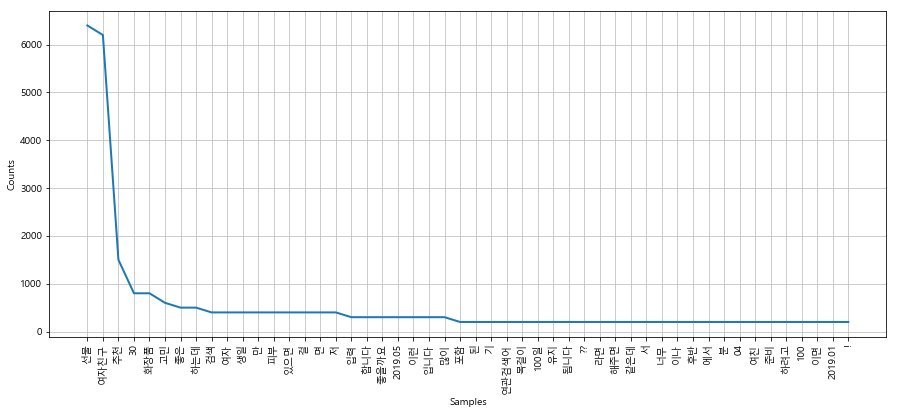

In [125]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [126]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

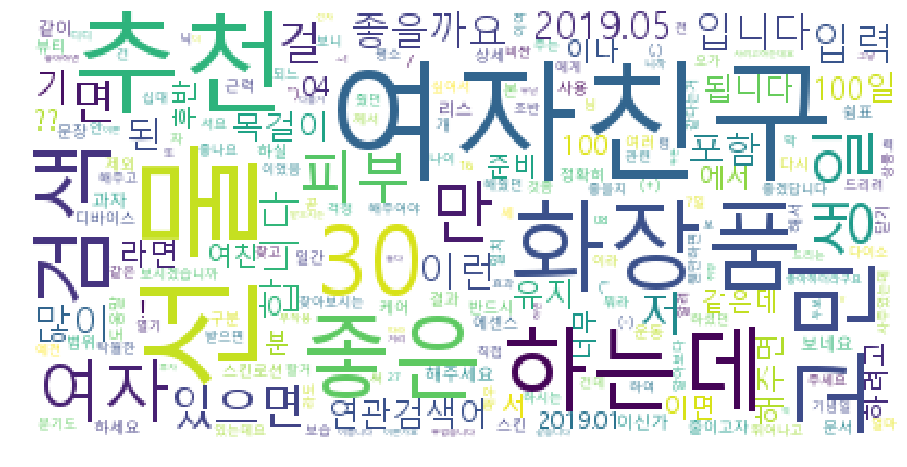

In [127]:
data = ko.vocab().most_common(300)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [128]:
mask = np.array(Image.open('../data/09. heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [130]:
data = ko.vocab().most_common(200)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

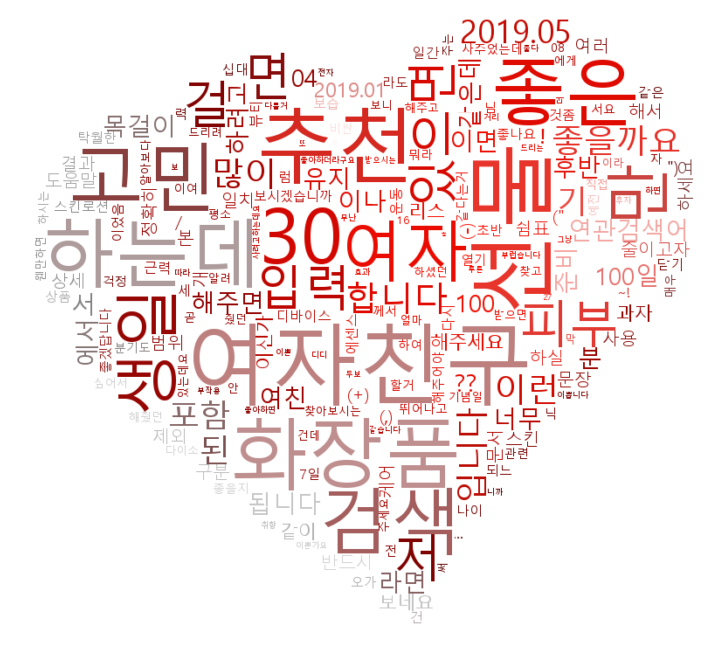

In [131]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

In [133]:
import gensim
from gensim.models import word2vec

In [134]:
twitter = Twitter()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r= []
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
            
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 오가다 닉 화장품 좋다 것좀 7일 전 20 대 여자친구 선물 보습 력 유지 되다 20 대 여자친구 선물 이다 좋다 나이 이 십대 초반 어떤 것 좋다 20 대 여자친구 선물 해주다 하다 답변 20 대 여자친구 선물 줄 만 상품 이 라면 세 럼 같다 20 대 여자친구 선물 탁월하다 건 같다 어떻다 피부 20 대 여자친구 선물 사주다 매우 수 분기도 뛰어나다
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 저 예전 여자친구 선물 주다 거 너무 좋아하다 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다
질문 20 대 후반 여자친구 선물 이다 2019.05 27 20 대 후반 여자친구 선물 이다 디디 두보 목걸이 사다 어떻다 것 더 이쁘다 답변 받다 분 취향 따르다 다르다 같다 두다 이쁘다 투톤 좋아하다 후자 그냥 무난 하다 전

질문 여자친구 선물 추천 부탁드리다 2019.04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴하다 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 30 대 여자친구 선물 질문 이 2019.01 30 30 대 여자친구 선물 화장품 사주다 하다 피부 갑자기 많이 상해 요즘 하다 30 대 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대 여자친구 선물 화장품 고민 중 보다 30 대 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 오가다 닉 화장품 좋다 것좀 7일 전 20 대 여자친구 선물 보습 력 유지 되다 20 대 여자친구 선물 이다 좋다 나이 이 십대 초반 어떤 것 좋다 20 대 여자친구 선물 해주다 하다 답변 20 대 여자친구 선물 줄 만 상품 이 라면 세 럼 같다 20 대 여자친구 선물 탁월하다 건 같다 어떻다 피부 20 대 여자친구 

질문 여자친구 선물 추천 해주다 분 2019.03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 추천 부탁드리다 2019.04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴하다 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 30 대 여자친구 선물 질문 이 2019.01 30 30 대 여자친구 선물 화장품 사주다 하다 피부 갑자기 많이 상해 요즘 하다 30 대 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대 여자친구 선물 화장품 고민 중 보다 30 대 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 여자친구 선물 추천 좀

질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 저 예전 여자친구 선물 주다 거 너무 좋아하다 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다
질문 20 대 후반 여자친구 선물 이다 2019.05 27 20 대 후반 여자친구 선물 이다 디디 두보 목걸이 사다 어떻다 것 더 이쁘다 답변 받다 분 취향 따르다 다르다 같다 두다 이쁘다 투톤 좋아하다 후자 그냥 무난 하다 전자 이다 이쁘다 목 거리 네 부럽다 ㅎ 아래 심플 하다 예쁘다
질문 여자친구 선물 추천 해주다 분 2019.03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 오가다 닉 화장품 좋다 것좀 7일 전 20 대 여자친구 선물 보습 력 유지 되다 20 대 여자친구 선물 이다 좋다 나이 이 십대 초반 어떤 것 좋다 20 대 여자친구 선물 해주다 하다 답변 20 대 여자친구 선물 줄 만 상품 이 라면 세 럼 같다 20 대 여자친구 선물 탁월하다 건 같다 어떻다 피부 20 대 여자친구 선물 사주다 매우 수 분기도 뛰어나다
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 저 예전 여자친구 선물 주다 거 너무 좋아하다 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다
질문 20 대 후반 여자친구 선물 이다 2019.05 27 20 대 후반 여자친구 선물 이다 디디 두보 목걸이 사다 어떻다 것 더 이쁘다 답변 받다 분 취향 따르다 다르다 같다 두다 이쁘다 투톤 좋아하다 후자 그냥 무난 하다 전자 이다 이쁘다 목 거리 네 부럽다 ㅎ 아래 심플 하다

질문 여자친구 선물 추천 부탁드리다 2019.04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴하다 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 30 대 여자친구 선물 질문 이 2019.01 30 30 대 여자친구 선물 화장품 사주다 하다 피부 갑자기 많이 상해 요즘 하다 30 대 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대 여자친구 선물 화장품 고민 중 보다 30 대 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 오가다 닉 화장품 좋다 것좀 7일 전 20 대 여자친구 선물 보습 력 유지 되다 20 대 여자친구 선물 이다 좋다 나이 이 십대 초반 어떤 것 좋다 20 대 여자친구 선물 해주다 하다 답변 20 대 여자친구 선물 줄 만 상품 이 라면 세 럼 같다 20 대 여자친구 선물 탁월하다 건 같다 어떻다 피부 20 대 여자친구 

질문 여자친구 선물 추천 해주다 분 2019.03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 추천 부탁드리다 2019.04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴하다 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 30 대 여자친구 선물 질문 이 2019.01 30 30 대 여자친구 선물 화장품 사주다 하다 피부 갑자기 많이 상해 요즘 하다 30 대 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대 여자친구 선물 화장품 고민 중 보다 30 대 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 여자친구 선물 추천 좀

질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 저 예전 여자친구 선물 주다 거 너무 좋아하다 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다
질문 20 대 후반 여자친구 선물 이다 2019.05 27 20 대 후반 여자친구 선물 이다 디디 두보 목걸이 사다 어떻다 것 더 이쁘다 답변 받다 분 취향 따르다 다르다 같다 두다 이쁘다 투톤 좋아하다 후자 그냥 무난 하다 전자 이다 이쁘다 목 거리 네 부럽다 ㅎ 아래 심플 하다 예쁘다
질문 여자친구 선물 추천 해주다 분 2019.03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 오가다 닉 화장품 좋다 것좀 7일 전 20 대 여자친구 선물 보습 력 유지 되다 20 대 여자친구 선물 이다 좋다 나이 이 십대 초반 어떤 것 좋다 20 대 여자친구 선물 해주다 하다 답변 20 대 여자친구 선물 줄 만 상품 이 라면 세 럼 같다 20 대 여자친구 선물 탁월하다 건 같다 어떻다 피부 20 대 여자친구 선물 사주다 매우 수 분기도 뛰어나다
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 저 예전 여자친구 선물 주다 거 너무 좋아하다 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다
질문 20 대 후반 여자친구 선물 이다 2019.05 27 20 대 후반 여자친구 선물 이다 디디 두보 목걸이 사다 어떻다 것 더 이쁘다 답변 받다 분 취향 따르다 다르다 같다 두다 이쁘다 투톤 좋아하다 후자 그냥 무난 하다 전자 이다 이쁘다 목 거리 네 부럽다 ㅎ 아래 심플 하다

질문 여자친구 선물 추천 부탁드리다 2019.04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴하다 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 30 대 여자친구 선물 질문 이 2019.01 30 30 대 여자친구 선물 화장품 사주다 하다 피부 갑자기 많이 상해 요즘 하다 30 대 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대 여자친구 선물 화장품 고민 중 보다 30 대 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 오가다 닉 화장품 좋다 것좀 7일 전 20 대 여자친구 선물 보습 력 유지 되다 20 대 여자친구 선물 이다 좋다 나이 이 십대 초반 어떤 것 좋다 20 대 여자친구 선물 해주다 하다 답변 20 대 여자친구 선물 줄 만 상품 이 라면 세 럼 같다 20 대 여자친구 선물 탁월하다 건 같다 어떻다 피부 20 대 여자친구 

질문 여자친구 선물 추천 해주다 분 2019.03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 추천 부탁드리다 2019.04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴하다 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 30 대 여자친구 선물 질문 이 2019.01 30 30 대 여자친구 선물 화장품 사주다 하다 피부 갑자기 많이 상해 요즘 하다 30 대 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대 여자친구 선물 화장품 고민 중 보다 30 대 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 여자친구 선물 추천 좀

질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 저 예전 여자친구 선물 주다 거 너무 좋아하다 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다
질문 20 대 후반 여자친구 선물 이다 2019.05 27 20 대 후반 여자친구 선물 이다 디디 두보 목걸이 사다 어떻다 것 더 이쁘다 답변 받다 분 취향 따르다 다르다 같다 두다 이쁘다 투톤 좋아하다 후자 그냥 무난 하다 전자 이다 이쁘다 목 거리 네 부럽다 ㅎ 아래 심플 하다 예쁘다
질문 여자친구 선물 추천 해주다 분 2019.03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 오가다 닉 화장품 좋다 것좀 7일 전 20 대 여자친구 선물 보습 력 유지 되다 20 대 여자친구 선물 이다 좋다 나이 이 십대 초반 어떤 것 좋다 20 대 여자친구 선물 해주다 하다 답변 20 대 여자친구 선물 줄 만 상품 이 라면 세 럼 같다 20 대 여자친구 선물 탁월하다 건 같다 어떻다 피부 20 대 여자친구 선물 사주다 매우 수 분기도 뛰어나다
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 저 예전 여자친구 선물 주다 거 너무 좋아하다 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다
질문 20 대 후반 여자친구 선물 이다 2019.05 27 20 대 후반 여자친구 선물 이다 디디 두보 목걸이 사다 어떻다 것 더 이쁘다 답변 받다 분 취향 따르다 다르다 같다 두다 이쁘다 투톤 좋아하다 후자 그냥 무난 하다 전자 이다 이쁘다 목 거리 네 부럽다 ㅎ 아래 심플 하다

질문 여자친구 선물 추천 부탁드리다 2019.04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴하다 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 30 대 여자친구 선물 질문 이 2019.01 30 30 대 여자친구 선물 화장품 사주다 하다 피부 갑자기 많이 상해 요즘 하다 30 대 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대 여자친구 선물 화장품 고민 중 보다 30 대 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 오가다 닉 화장품 좋다 것좀 7일 전 20 대 여자친구 선물 보습 력 유지 되다 20 대 여자친구 선물 이다 좋다 나이 이 십대 초반 어떤 것 좋다 20 대 여자친구 선물 해주다 하다 답변 20 대 여자친구 선물 줄 만 상품 이 라면 세 럼 같다 20 대 여자친구 선물 탁월하다 건 같다 어떻다 피부 20 대 여자친구 

질문 여자친구 선물 추천 해주다 분 2019.03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 추천 부탁드리다 2019.04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴하다 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 30 대 여자친구 선물 질문 이 2019.01 30 30 대 여자친구 선물 화장품 사주다 하다 피부 갑자기 많이 상해 요즘 하다 30 대 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대 여자친구 선물 화장품 고민 중 보다 30 대 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 여자친구 선물 추천 좀

질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 저 예전 여자친구 선물 주다 거 너무 좋아하다 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다
질문 20 대 후반 여자친구 선물 이다 2019.05 27 20 대 후반 여자친구 선물 이다 디디 두보 목걸이 사다 어떻다 것 더 이쁘다 답변 받다 분 취향 따르다 다르다 같다 두다 이쁘다 투톤 좋아하다 후자 그냥 무난 하다 전자 이다 이쁘다 목 거리 네 부럽다 ㅎ 아래 심플 하다 예쁘다
질문 여자친구 선물 추천 해주다 분 2019.03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 오가다 닉 화장품 좋다 것좀 7일 전 20 대 여자친구 선물 보습 력 유지 되다 20 대 여자친구 선물 이다 좋다 나이 이 십대 초반 어떤 것 좋다 20 대 여자친구 선물 해주다 하다 답변 20 대 여자친구 선물 줄 만 상품 이 라면 세 럼 같다 20 대 여자친구 선물 탁월하다 건 같다 어떻다 피부 20 대 여자친구 선물 사주다 매우 수 분기도 뛰어나다
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 저 예전 여자친구 선물 주다 거 너무 좋아하다 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다
질문 20 대 후반 여자친구 선물 이다 2019.05 27 20 대 후반 여자친구 선물 이다 디디 두보 목걸이 사다 어떻다 것 더 이쁘다 답변 받다 분 취향 따르다 다르다 같다 두다 이쁘다 투톤 좋아하다 후자 그냥 무난 하다 전자 이다 이쁘다 목 거리 네 부럽다 ㅎ 아래 심플 하다

질문 여자친구 선물 추천 부탁드리다 2019.04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴하다 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 30 대 여자친구 선물 질문 이 2019.01 30 30 대 여자친구 선물 화장품 사주다 하다 피부 갑자기 많이 상해 요즘 하다 30 대 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대 여자친구 선물 화장품 고민 중 보다 30 대 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 오가다 닉 화장품 좋다 것좀 7일 전 20 대 여자친구 선물 보습 력 유지 되다 20 대 여자친구 선물 이다 좋다 나이 이 십대 초반 어떤 것 좋다 20 대 여자친구 선물 해주다 하다 답변 20 대 여자친구 선물 줄 만 상품 이 라면 세 럼 같다 20 대 여자친구 선물 탁월하다 건 같다 어떻다 피부 20 대 여자친구 

질문 여자친구 선물 추천 해주다 분 2019.03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 추천 부탁드리다 2019.04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴하다 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 30 대 여자친구 선물 질문 이 2019.01 30 30 대 여자친구 선물 화장품 사주다 하다 피부 갑자기 많이 상해 요즘 하다 30 대 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대 여자친구 선물 화장품 고민 중 보다 30 대 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 여자친구 선물 추천 좀

질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 저 예전 여자친구 선물 주다 거 너무 좋아하다 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다
질문 20 대 후반 여자친구 선물 이다 2019.05 27 20 대 후반 여자친구 선물 이다 디디 두보 목걸이 사다 어떻다 것 더 이쁘다 답변 받다 분 취향 따르다 다르다 같다 두다 이쁘다 투톤 좋아하다 후자 그냥 무난 하다 전자 이다 이쁘다 목 거리 네 부럽다 ㅎ 아래 심플 하다 예쁘다
질문 여자친구 선물 추천 해주다 분 2019.03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 오가다 닉 화장품 좋다 것좀 7일 전 20 대 여자친구 선물 보습 력 유지 되다 20 대 여자친구 선물 이다 좋다 나이 이 십대 초반 어떤 것 좋다 20 대 여자친구 선물 해주다 하다 답변 20 대 여자친구 선물 줄 만 상품 이 라면 세 럼 같다 20 대 여자친구 선물 탁월하다 건 같다 어떻다 피부 20 대 여자친구 선물 사주다 매우 수 분기도 뛰어나다
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 저 예전 여자친구 선물 주다 거 너무 좋아하다 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다
질문 20 대 후반 여자친구 선물 이다 2019.05 27 20 대 후반 여자친구 선물 이다 디디 두보 목걸이 사다 어떻다 것 더 이쁘다 답변 받다 분 취향 따르다 다르다 같다 두다 이쁘다 투톤 좋아하다 후자 그냥 무난 하다 전자 이다 이쁘다 목 거리 네 부럽다 ㅎ 아래 심플 하다

질문 여자친구 선물 추천 부탁드리다 2019.04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴하다 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 30 대 여자친구 선물 질문 이 2019.01 30 30 대 여자친구 선물 화장품 사주다 하다 피부 갑자기 많이 상해 요즘 하다 30 대 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대 여자친구 선물 화장품 고민 중 보다 30 대 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 오가다 닉 화장품 좋다 것좀 7일 전 20 대 여자친구 선물 보습 력 유지 되다 20 대 여자친구 선물 이다 좋다 나이 이 십대 초반 어떤 것 좋다 20 대 여자친구 선물 해주다 하다 답변 20 대 여자친구 선물 줄 만 상품 이 라면 세 럼 같다 20 대 여자친구 선물 탁월하다 건 같다 어떻다 피부 20 대 여자친구 

질문 여자친구 선물 추천 해주다 분 2019.03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 추천 부탁드리다 2019.04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴하다 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 30 대 여자친구 선물 질문 이 2019.01 30 30 대 여자친구 선물 화장품 사주다 하다 피부 갑자기 많이 상해 요즘 하다 30 대 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대 여자친구 선물 화장품 고민 중 보다 30 대 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 여자친구 선물 추천 좀

질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 저 예전 여자친구 선물 주다 거 너무 좋아하다 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다
질문 20 대 후반 여자친구 선물 이다 2019.05 27 20 대 후반 여자친구 선물 이다 디디 두보 목걸이 사다 어떻다 것 더 이쁘다 답변 받다 분 취향 따르다 다르다 같다 두다 이쁘다 투톤 좋아하다 후자 그냥 무난 하다 전자 이다 이쁘다 목 거리 네 부럽다 ㅎ 아래 심플 하다 예쁘다
질문 여자친구 선물 추천 해주다 분 2019.03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 오가다 닉 화장품 좋다 것좀 7일 전 20 대 여자친구 선물 보습 력 유지 되다 20 대 여자친구 선물 이다 좋다 나이 이 십대 초반 어떤 것 좋다 20 대 여자친구 선물 해주다 하다 답변 20 대 여자친구 선물 줄 만 상품 이 라면 세 럼 같다 20 대 여자친구 선물 탁월하다 건 같다 어떻다 피부 20 대 여자친구 선물 사주다 매우 수 분기도 뛰어나다
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 저 예전 여자친구 선물 주다 거 너무 좋아하다 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다
질문 20 대 후반 여자친구 선물 이다 2019.05 27 20 대 후반 여자친구 선물 이다 디디 두보 목걸이 사다 어떻다 것 더 이쁘다 답변 받다 분 취향 따르다 다르다 같다 두다 이쁘다 투톤 좋아하다 후자 그냥 무난 하다 전자 이다 이쁘다 목 거리 네 부럽다 ㅎ 아래 심플 하다

질문 여자친구 선물 추천 부탁드리다 2019.04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴하다 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 30 대 여자친구 선물 질문 이 2019.01 30 30 대 여자친구 선물 화장품 사주다 하다 피부 갑자기 많이 상해 요즘 하다 30 대 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대 여자친구 선물 화장품 고민 중 보다 30 대 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 오가다 닉 화장품 좋다 것좀 7일 전 20 대 여자친구 선물 보습 력 유지 되다 20 대 여자친구 선물 이다 좋다 나이 이 십대 초반 어떤 것 좋다 20 대 여자친구 선물 해주다 하다 답변 20 대 여자친구 선물 줄 만 상품 이 라면 세 럼 같다 20 대 여자친구 선물 탁월하다 건 같다 어떻다 피부 20 대 여자친구 

질문 여자친구 선물 추천 해주다 분 2019.03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 추천 부탁드리다 2019.04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴하다 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 30 대 여자친구 선물 질문 이 2019.01 30 30 대 여자친구 선물 화장품 사주다 하다 피부 갑자기 많이 상해 요즘 하다 30 대 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대 여자친구 선물 화장품 고민 중 보다 30 대 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 여자친구 선물 추천 좀

In [135]:

data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

In [136]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, 
                                                                        min_count=2, sg=1)
model.save('pres_girl.model')

C:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
C:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [137]:
model = word2vec.Word2Vec.load("pres_girl.model")

C:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [138]:
model.most_similar(positive=['선물'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('여자친구', 0.7936040163040161),
 ('추천', 0.4192654490470886),
 ('저', 0.2994982898235321),
 ('주다', 0.29859697818756104),
 ('답변', 0.2930334210395813),
 ('있다', 0.28060829639434814),
 ('드리다', 0.27779221534729004),
 ('해주다', 0.27446186542510986),
 ('줄', 0.2736783027648926),
 ('만', 0.2673950493335724)]

In [139]:
model.most_similar(positive=['여자친구'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('선물', 0.7936040163040161),
 ('주다', 0.3996489346027374),
 ('추천', 0.37559598684310913),
 ('고민', 0.3734874725341797),
 ('있다', 0.3284738063812256),
 ('줄', 0.3125147819519043),
 ('이', 0.30353909730911255),
 ('거', 0.2977221608161926),
 ('걸', 0.29129210114479065),
 ('저', 0.2897081673145294)]